In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',20000)

In [128]:
df=pd.read_excel('Flight_Price_Data.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [131]:
# Convert Date of Journey into dates, months, and years.

In [5]:
df['Date_Journey']=df['Date_of_Journey'].str.split('/').str[0]

In [6]:
df['Month_Journey']=df['Date_of_Journey'].str.split('/').str[1]

In [7]:
df['Year_Journey']=df['Date_of_Journey'].str.split('/').str[2]

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [9]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [10]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [130]:
# Convert Duration into hours and minutes.

In [61]:
df['Duration_hour']=df['Duration_hour'].str.split('h').str[0].replace('h','')

In [13]:
df['Duration_MInutes']=df['Duration'].str.split(' ').str[1].str.replace('m','')

In [14]:
df['Duration_MInutes']

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration_MInutes, Length: 10683, dtype: object

In [24]:
df['Duration_MInutes']=np.where(df['Duration_MInutes'].isnull(),0,df['Duration_MInutes'])

In [25]:
df['Duration_MInutes']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_MInutes, Length: 10683, dtype: object

In [27]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Duration_hour,Duration_MInutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,7,25


In [28]:
df.drop('Duration',axis=1,inplace=True)

In [29]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Duration_hour,Duration_MInutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,03,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,05,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,06,2019,19,0


In [132]:
# Convert Dep_Time into Hour and Mins

In [36]:
df['Dep_Time_Hour']=df['Dep_Time'].str.split(':').str[0]

In [37]:
df['Dep_Time_Hour']

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Time_Hour, Length: 10683, dtype: object

In [38]:
df['Dep_Time_Min']=df['Dep_Time'].str.split(':').str[1]

In [39]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Duration_hour,Duration_MInutes,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,03,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,05,2019,7,25,05,50


In [41]:
df.drop('Dep_Time',axis=1,inplace=True)

In [42]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Duration_hour,Duration_MInutes,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,03,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,05,2019,7,25,05,50


In [47]:
df['Date_Journey']=df['Date_Journey'].astype(int)
df['Month_Journey']=df['Month_Journey'].astype(int)
df['Year_Journey']=df['Year_Journey'].astype(int)

In [52]:
df['Dep_Time_Min'].unique()

array(['20', '50', '25', '05', '00', '55', '45', '40', '10', '15', '35',
       '30'], dtype=object)

In [70]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Date_Journey,Month_Journey,Year_Journey,Duration_hour,Duration_MInutes,Dep_Time_Hour,Dep_Time_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:55,2 stops,No info,17327,6,3,2019,5m,0,16,50


In [71]:
df.drop(6474,axis=0,inplace=True)

In [58]:
#df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_MInutes']=df['Duration_MInutes'].astype(int)
df['Dep_Time_Hour']=df['Dep_Time_Hour'].astype(int)
df['Dep_Time_Min']=df['Dep_Time_Min'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Arrival_Time      10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date_Journey      10683 non-null  int32 
 9   Month_Journey     10683 non-null  int32 
 10  Year_Journey      10683 non-null  int32 
 11  Duration_hour     10683 non-null  object
 12  Duration_MInutes  10683 non-null  int32 
 13  Dep_Time_Hour     10683 non-null  int32 
 14  Dep_Time_Min      10683 non-null  int32 
dtypes: int32(6), int64(1), object(8)
memory usage: 1001.7+ KB


In [64]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [133]:
# Using Label Encoder for Categorical features

In [66]:
from sklearn.preprocessing import LabelEncoder

In [76]:
df1=df.copy()

In [78]:
lb=LabelEncoder()
df1['Additional_Info']=lb.fit_transform(df1['Additional_Info'])

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10681 non-null  object
 4   Arrival_Time      10682 non-null  object
 5   Total_Stops       10681 non-null  object
 6   Additional_Info   10682 non-null  int32 
 7   Price             10682 non-null  int64 
 8   Date_Journey      10682 non-null  int32 
 9   Month_Journey     10682 non-null  int32 
 10  Year_Journey      10682 non-null  int32 
 11  Duration_hour     10682 non-null  int32 
 12  Duration_MInutes  10682 non-null  int32 
 13  Dep_Time_Hour     10682 non-null  int32 
 14  Dep_Time_Min      10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 1001.4+ KB


In [82]:
df1['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [84]:
df1['Airline']=lb.fit_transform(df1['Airline'])

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10681 non-null  object
 4   Arrival_Time      10682 non-null  object
 5   Total_Stops       10681 non-null  object
 6   Additional_Info   10682 non-null  int32 
 7   Price             10682 non-null  int64 
 8   Date_Journey      10682 non-null  int32 
 9   Month_Journey     10682 non-null  int32 
 10  Year_Journey      10682 non-null  int32 
 11  Duration_hour     10682 non-null  int32 
 12  Duration_MInutes  10682 non-null  int32 
 13  Dep_Time_Hour     10682 non-null  int32 
 14  Dep_Time_Min      10682 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 959.7+ KB


In [86]:
df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [87]:
df1['Source']=lb.fit_transform(df1['Source'])
df1['Destination']=lb.fit_transform(df1['Destination'])

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  int32 
 2   Destination       10682 non-null  int32 
 3   Route             10681 non-null  object
 4   Arrival_Time      10682 non-null  object
 5   Total_Stops       10681 non-null  object
 6   Additional_Info   10682 non-null  int32 
 7   Price             10682 non-null  int64 
 8   Date_Journey      10682 non-null  int32 
 9   Month_Journey     10682 non-null  int32 
 10  Year_Journey      10682 non-null  int32 
 11  Duration_hour     10682 non-null  int32 
 12  Duration_MInutes  10682 non-null  int32 
 13  Dep_Time_Hour     10682 non-null  int32 
 14  Dep_Time_Min      10682 non-null  int32 
dtypes: int32(11), int64(1), object(3)
memory usage: 876.3+ KB


In [89]:
df1.drop('Route',axis=1,inplace=True) 

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  int32 
 2   Destination       10682 non-null  int32 
 3   Arrival_Time      10682 non-null  object
 4   Total_Stops       10681 non-null  object
 5   Additional_Info   10682 non-null  int32 
 6   Price             10682 non-null  int64 
 7   Date_Journey      10682 non-null  int32 
 8   Month_Journey     10682 non-null  int32 
 9   Year_Journey      10682 non-null  int32 
 10  Duration_hour     10682 non-null  int32 
 11  Duration_MInutes  10682 non-null  int32 
 12  Dep_Time_Hour     10682 non-null  int32 
 13  Dep_Time_Min      10682 non-null  int32 
dtypes: int32(11), int64(1), object(2)
memory usage: 792.8+ KB


In [91]:
df1['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [93]:
df1['Total_Stops']=lb.fit_transform(df1['Total_Stops'])

In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  int32 
 2   Destination       10682 non-null  int32 
 3   Arrival_Time      10682 non-null  object
 4   Total_Stops       10682 non-null  int32 
 5   Additional_Info   10682 non-null  int32 
 6   Price             10682 non-null  int64 
 7   Date_Journey      10682 non-null  int32 
 8   Month_Journey     10682 non-null  int32 
 9   Year_Journey      10682 non-null  int32 
 10  Duration_hour     10682 non-null  int32 
 11  Duration_MInutes  10682 non-null  int32 
 12  Dep_Time_Hour     10682 non-null  int32 
 13  Dep_Time_Min      10682 non-null  int32 
dtypes: int32(12), int64(1), object(1)
memory usage: 751.1+ KB


In [108]:
df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
5        11:25
6        10:25
7        05:05
8        10:25
9        19:15
10       23:00
11       22:55
12       13:55
13       09:20
14       19:50
15       19:15
16       13:15
17       12:35
18       19:15
19       12:35
20       19:20
21       13:20
22       06:50
23       21:50
24       08:15
25       12:35
26       03:35
27       12:55
28       12:35
29       09:20
30       09:20
31       23:15
32       06:50
33       12:35
34       12:35
35       21:00
36       20:20
37       16:45
38       13:15
39       19:00
40       18:10
41       15:15
42       19:00
43       13:55
44       21:00
45       08:35
46       06:50
47       13:55
48       11:05
49       19:00
50       14:15
51       10:55
52       01:10
53       00:15
54       02:45
55       12:00
56       23:55
57       09:20
58       01:30
59       16:45
60       21:50
61       09:25
62       19:00
63       01:30
64       09:20
65       21:00
66       1

In [109]:
df1['Arrival_Time']=df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [110]:
df1['Arrival_Time'].str.split(':').str[1]

0        10
1        15
2        25
3        30
4        35
5        25
6        25
7        05
8        25
9        15
10       00
11       55
12       55
13       20
14       50
15       15
16       15
17       35
18       15
19       35
20       20
21       20
22       50
23       50
24       15
25       35
26       35
27       55
28       35
29       20
30       20
31       15
32       50
33       35
34       35
35       00
36       20
37       45
38       15
39       00
40       10
41       15
42       00
43       55
44       00
45       35
46       50
47       55
48       05
49       00
50       15
51       55
52       10
53       15
54       45
55       00
56       55
57       20
58       30
59       45
60       50
61       25
62       00
63       30
64       20
65       00
66       35
67       25
68       15
69       35
70       30
71       15
72       00
73       35
74       05
75       35
76       30
77       55
78       35
79       35
80       00
81       35
82       40
83  

In [111]:
df1['Arrival_Hour']=df1['Arrival_Time'].str.split(':').str[0]

In [112]:
df1['Arrival_Min']=df1['Arrival_Time'].str.split(':').str[1]

In [115]:
df1['Arrival_Hour']=df1['Arrival_Hour'].astype(int)
df1['Arrival_Min']=df1['Arrival_Min'].astype(int)

In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  int32 
 2   Destination       10682 non-null  int32 
 3   Arrival_Time      10682 non-null  object
 4   Total_Stops       10682 non-null  int32 
 5   Additional_Info   10682 non-null  int32 
 6   Price             10682 non-null  int64 
 7   Date_Journey      10682 non-null  int32 
 8   Month_Journey     10682 non-null  int32 
 9   Year_Journey      10682 non-null  int32 
 10  Duration_hour     10682 non-null  int32 
 11  Duration_MInutes  10682 non-null  int32 
 12  Dep_Time_Hour     10682 non-null  int32 
 13  Dep_Time_Min      10682 non-null  int32 
 14  Arrival_Hour      10682 non-null  int32 
 15  Arrival_Min       10682 non-null  int32 
dtypes: int32(14), int64(1), object(1)
memory usage: 834.5+ KB


In [119]:
df1.drop('Arrival_Time',axis=1,inplace=True)

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10682 non-null  int32
 1   Source            10682 non-null  int32
 2   Destination       10682 non-null  int32
 3   Total_Stops       10682 non-null  int32
 4   Additional_Info   10682 non-null  int32
 5   Price             10682 non-null  int64
 6   Date_Journey      10682 non-null  int32
 7   Month_Journey     10682 non-null  int32
 8   Year_Journey      10682 non-null  int32
 9   Duration_hour     10682 non-null  int32
 10  Duration_MInutes  10682 non-null  int32
 11  Dep_Time_Hour     10682 non-null  int32
 12  Dep_Time_Min      10682 non-null  int32
 13  Arrival_Hour      10682 non-null  int32
 14  Arrival_Min       10682 non-null  int32
dtypes: int32(14), int64(1)
memory usage: 751.1 KB


In [124]:
df1.shape

(10682, 15)

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10682 non-null  int32
 1   Source            10682 non-null  int32
 2   Destination       10682 non-null  int32
 3   Total_Stops       10682 non-null  int32
 4   Additional_Info   10682 non-null  int32
 5   Price             10682 non-null  int64
 6   Date_Journey      10682 non-null  int32
 7   Month_Journey     10682 non-null  int32
 8   Year_Journey      10682 non-null  int32
 9   Duration_hour     10682 non-null  int32
 10  Duration_MInutes  10682 non-null  int32
 11  Dep_Time_Hour     10682 non-null  int32
 12  Dep_Time_Min      10682 non-null  int32
 13  Arrival_Hour      10682 non-null  int32
 14  Arrival_Min       10682 non-null  int32
dtypes: int32(14), int64(1)
memory usage: 751.1 KB


In [126]:
df1.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Date_Journey        0
Month_Journey       0
Year_Journey        0
Duration_hour       0
Duration_MInutes    0
Dep_Time_Hour       0
Dep_Time_Min        0
Arrival_Hour        0
Arrival_Min         0
dtype: int64

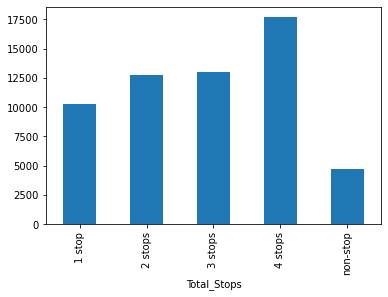

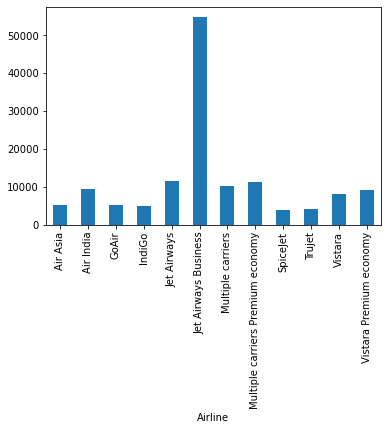

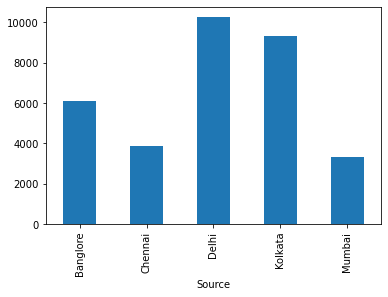

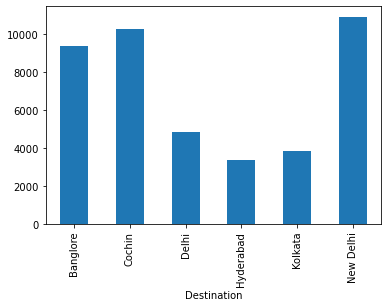

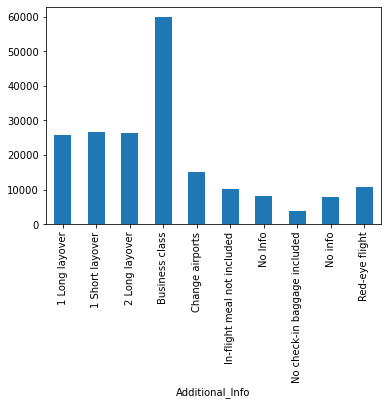

In [19]:
for f in ['Total_Stops','Airline','Source','Destination','Additional_Info']:
    df.groupby(f)['Price'].median().plot.bar()
    plt.xlabel(f)
    plt.show()